**Import Libraries and Load Dataset**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point
import geopandas as gpd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(data.head())

  Reference Number  Grid Ref: Easting  Grid Ref: Northing  Number of Vehicles  \
0          1112091             429175              431904                   2   
1          1180869             430429              431025                   3   
2          1180869             430429              431025                   3   
3          11A0238             424660              427582                   3   
4          11A0238             424660              427582                   3   

   Number of Casualties Accident Date  Time (24hr)  1st Road Class  \
0                     1    01/01/2014         1840               6   
1                     2    08/01/2014         1430               1   
2                     2    08/01/2014         1430               1   
3                     2    10/01/2014          817               1   
4                     2    10/01/2014          817               1   

   Road Surface  Lighting Conditions  Weather Conditions  Casualty Class  \
0             2 

**Set Visualization Style**

In [27]:
# Set the style for seaborn
sns.set(style="whitegrid")

**Bar Plot for Accidents by Road Surface Conditions**

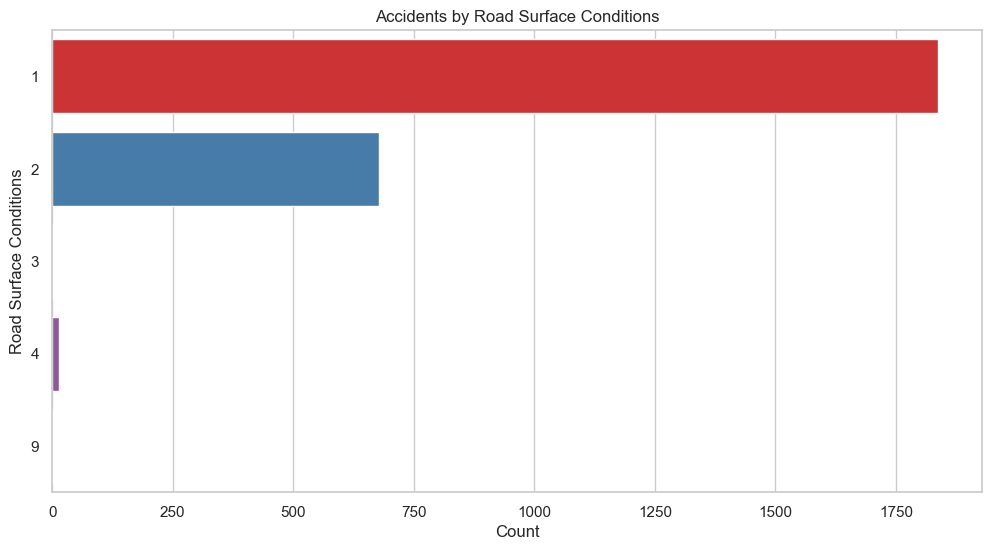

In [28]:
# Create the bar plot for accidents by road surface conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='Road Surface', data=data, palette='Set1')  
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Count')
plt.ylabel('Road Surface Conditions')
plt.show()

**Bar Plot for Accidents by Weather Conditions**

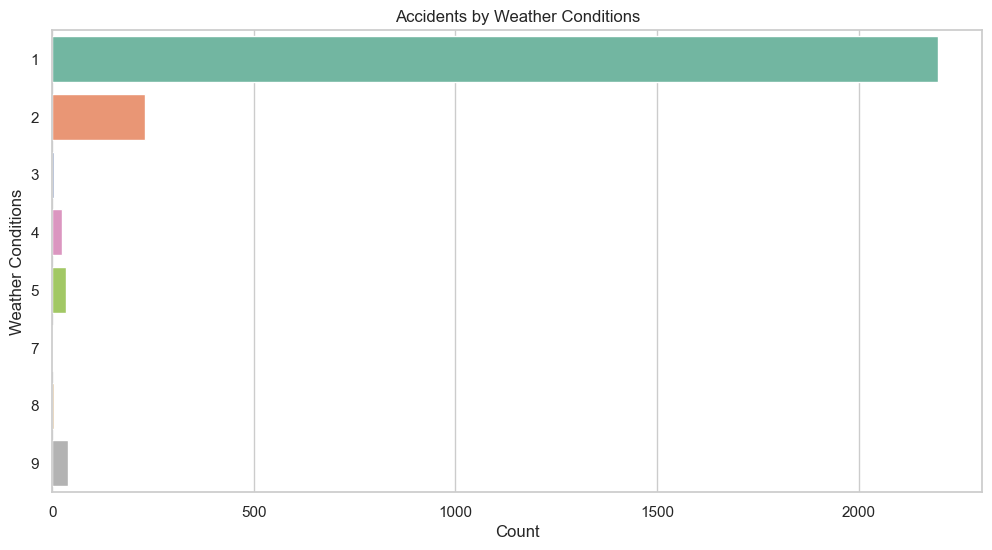

In [29]:
# Create the bar plot for accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather Conditions', data=data, palette='Set2')  
plt.title('Accidents by Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()

**Histogram for Accidents by Time of Day**

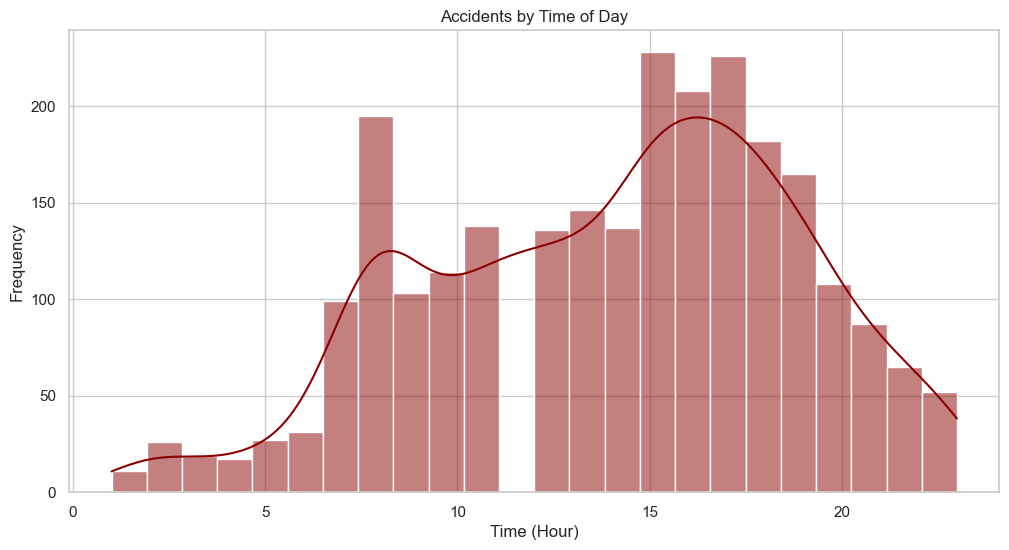

In [30]:
# Create the histogram for accidents by time of day
# Convert 'Time (24hr)' to datetime to extract hour
data['Time (24hr)'] = pd.to_datetime(data['Time (24hr)'], format='%H%M', errors='coerce').dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data['Time (24hr)'], bins=24, kde=True, color='darkred')  
plt.title('Accidents by Time of Day')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency')
plt.show()

**Heatmap of Correlation Matrix for Numerical Variables**

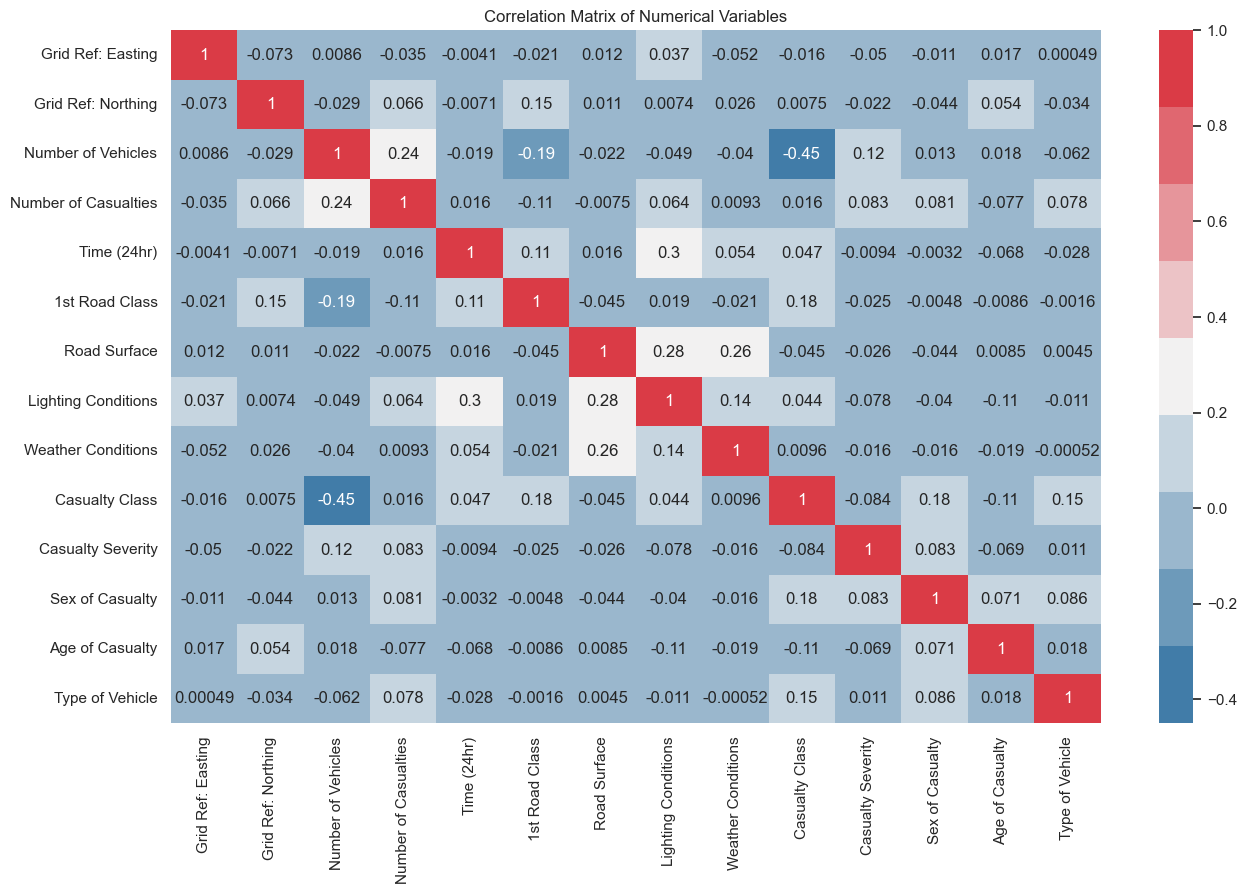

In [31]:
# Selecting numerical columns for correlation analysis
df_num = data.select_dtypes(include=['int64', 'float64'])

# Heatmap of correlation matrix for numerical columns
plt.figure(figsize=(15, 9))
sns.heatmap(df_num.corr(), annot=True, cmap=sns.diverging_palette(240, 10, n=9, center="light"))
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Pie Chart for Accident Severity**

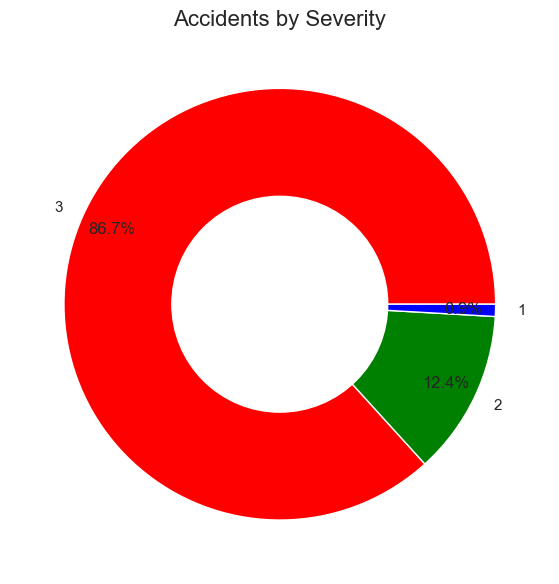

In [32]:
# Pie chart of accident severity
accidents_severity = data['Casualty Severity'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
labels = accidents_severity.index
sizes = accidents_severity.values
colors = ['red', 'green', 'blue']  # Define colors for each severity level
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle((0, 0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accidents by Severity", fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()